#线性回归
线性回归是一种用来对于连续性变量进行预测的办法

#1 问题的引出
![images](images/03/03.png)


$x_1$ : 房子大小, $x_2$ : 卧室数量, $x_3$ : 楼层数量, $x_4$ : 房龄, y : 房子的价格，则有：

$x_1=\begin{bmatrix}
2104\\
1416\\
1534\\
852\\
...
\end{bmatrix}$
$x_2=\begin{bmatrix}
5\\
3\\
3\\
2\\
...
\end{bmatrix}$
$x_3=\begin{bmatrix}
1\\
2\\
2\\
1\\
...
\end{bmatrix}$
$x_4=\begin{bmatrix}
45\\
40\\
30\\
36\\
...
\end{bmatrix}$
$y=\begin{bmatrix}
460\\
232\\
315\\
178\\
...
\end{bmatrix}$
$h_{\Theta}(X)=\Theta_0+\Theta_1x_1+\Theta_2x_2+...+\Theta_nx_n$,这时，使用线性代数表示更为方便。我们假设，$x_0=1$
$x=\begin{bmatrix}
x_1\\
x_2\\
x_3\\
...\\
x_n
\end{bmatrix}$
$\theta=\begin{bmatrix}
\theta_1\\
\theta_2\\
\theta_3\\
...\\
\theta_n
\end{bmatrix}$
$h_{\Theta}(X)=\Theta^TX$

对于样本大概符合线性关系的情况，我们总是可以写出公式$Y=\Theta^TX+\varepsilon$，Y是实际的结果，$\Theta^TX$是计算出来的结果，$\varepsilon$是误差。根据中心极限定理，我们知道每个样本距离线性回归曲线的误差，是独立并且具有相同的分布，通常认为服从高斯分布$N-(0, \sigma^2)$

#2 线性回归的似然函数

由于$\varepsilon$符合高斯分布$N-(0, \sigma^2)$，那么就有$P(\varepsilon)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\varepsilon^2}{2\sigma^2}}$，并且$\varepsilon=Y-\Theta^TX$，则有
$$
P(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}
$$
那么它的似然函数就是它的联合概率密度，则有$L(\theta)=\prod_{i=1}^mP(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}$

接下来求其对数似然

$\ell(\theta)=logL(\theta)=log\prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}=\sum_{i=1}^mlog\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}$

$\Rightarrow \ell(\theta)=mlog\frac{1}{\sqrt{2\pi}\sigma}-\frac{1}{\sigma^2} \bullet \frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2$

对于我们来说需要求最大似然，由于$=mlog\frac{1}{\sqrt{2\pi}\sigma}$和$\frac{1}{\sigma^2}$都是定值，所以我们只要求$\frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2$的最小值就行了，也就有了
$$
J(\theta)=\frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2
$$
这就是损失函数，也可以写成
$$
J(\theta)=\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
发现里面是期望值与真实值的差值的平方，这不就是最小二乘吗。

所以误差符合高斯分布，那就是最小二乘

#3. $\theta$的解法


##3.1 最小二乘法
首先解释以下损失函数中的各个符号的意义
- $y^{(i)}$表示样本第i行的期望值
- $x^{(i)}$表示样本第i行的特征值，是一个行向量$x_{i1},x_{i2},...,x_{in}$
- $h_{\theta}(x^{(i)})$是第i行计算出来的实际值

所以损失函数也可以写成$J(\theta)=\frac{1}{2}(X\Theta-Y)^T(X\Theta-Y)$，其中X是$m*n$的样本，$\Theta$是一个$m*1$的列向量，Y也是一个$m*1$的列向量


推导：

$J(\Theta)=\frac{1}{2}(\Theta^TX^T-Y^T)(X\Theta-Y)=\frac{1}{2}(\Theta^TX^TX\Theta-\Theta^TX^TY-Y^TX\Theta+Y^TY)$，因为我们希望找到$J(\Theta)$的最小值，那么需要求出$\frac{\partial{J(\Theta)}}{\partial{\Theta}}$，$\because X^TX$一定是对称矩阵，根据线性代数的法则$\frac{\partial{\Theta^TA\Theta}}{\partial{\Theta}}=2A\Theta$，则有

$\frac{\partial{J(\Theta)}}{\partial{\Theta}}=\frac{1}{2}(2X^TX\Theta-X^TY-(Y^TX)^T+0)$

$\frac{\partial{J(\Theta)}}{\partial{\Theta}}=\frac{1}{2}(2X^TX\Theta-2X^TY)$

$\therefore \frac{\partial{J(\Theta)}}{\partial{\Theta}}=X^TX\Theta-X^TY$，现在我们令其等于0，那么就有$X^TX\Theta = X^TY$，如果$X^TX$是可逆的，那么$\Theta=(X^TX)^{-1} \bullet X^TY$

如果$X^TX$不可逆或者为了防止过拟合，可以增加$\lambda$扰动，有$\Theta=(X^TX+\lambda{I})^{-1} \bullet X^TY$。由于$X^TX$一定是一个半正定矩阵，那么加上一个$\lambda{I}$，则一定是一个正定矩阵，正定矩阵一定是可逆的

损失函数$J(\Theta)$一定是一个凸函数，开口向上的，所以它有极小值，这是因为它的二次项$\Theta^TX^XT\Theta$，它的一阶导数是$2X^TX\Theta$，二阶导数就是$2X^TX$，这个一定是半正定的,半正定的函数一定是凸函数

##3.2 梯度下降法
梯度方向是函数值变化最快的方向
- 全微分：考虑所有自变量变化时，函数值的变化情况
- 偏微分：假设其它自变量不变，考虑一个变量变化，函数值的变化情况

$\Delta{y}=\sum_{i=1}^n\frac{\partial}{\partial{x_i}}\Delta{x_i}$
- 梯度向量:所有变量偏微分组成的向量。梯度方向由L(θ)对θ的偏导数确定,所以我们需要沿着负梯度方向往下走

梯度下降法的思路就是找到负梯度方向，然后不停的以一个很小的间隔去向它移动，直到前后两次的高度差小于一定范围的时候，停止，这个时候可以求出m和b,这就涉及到一个问题，这个很小的间隔怎么选取，我们管这个参数叫做$\alpha$，一般定义为0.001，这个参数太大了，会在底部不停震荡，如果太小，那么迭代次数太多

- 批量梯度下降算法:BGD。拿到所有样本进行梯度下降
- 随机梯度下降算法:SGD,优先选择.每次拿到一个样本就开始梯度下降
- mini-batch梯度下降算法:拿到一部分样本进行梯度下降

假设有n个特征，表达式如下$h(\Theta)=\Theta_0+\Theta_1x_1+\Theta_2x_2+...+\Theta_nx_n$那么
$$
Repeat\{
   \Theta_j := \Theta_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_j^{(i)}, j={0,1,...,n}
\}
$$

$\Theta_0 := \Theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_0^{(i)}$

$\Theta_1 := \Theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_1^{(i)}$

$\Theta_2 := \Theta_2 - \alpha\frac{1}{m}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_2^{(i)}$

![images](images/03/01.png)
这是什么意思，首先给$\Theta_0,\Theta_1,...\Theta_n$设置初始值，基本都是1，然后中间部分一样，这个值就是用这些初始值带入m个向量，可以得到m个值，用这m个值分别减去它们对应的y值，然后用这个值分别乘以对应记录的当前向量特征的值($\Theta_0$就是$X_0$，$X_0$没有，就是1，$\Theta_1$就是当前记录的第一个特征的值)然后将这m个值求和,然后乘以步长，乘以$\frac{1}{m}$,这个值我们可以叫他$\delta$。对于$\Theta_0$来说，他的下一个值就是$\Theta_0-\delta$，对于$\Theta_1$来说，他的下一个值就是$\Theta_1-\delta$...直到前后两次的高度差小于一定范围

下面三幅图分别是order为3，6，9的情况下，梯度下降法(红色)和最小二乘法(绿色)的拟合曲线
![images](images/03/04.png)
![images](images/03/05.png)
![images](images/03/06.png)

#4 线性回归的复杂度惩罚因子
对于线性回归来说，n个样本必然能找到一个最高阶为n-1次方的函数，使得求的的曲线经过所有点，但是这样存在两个问题
- 过拟合
- 所求的$\Theta$系数过大

基于此，需要将目标函数增加平方和损失$J(\Theta)=\frac{1}{2}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\Theta_j^2$，新加的东西叫做正则项，由于是取的平方，所以也叫做L2正则；在线性回归中，这个叫做岭(Ridge)回归

#5 线性回归的扩展
前面已经提到过，线性回归模型的基本特征就是，模型是参数向量$\alpha={\alpha_0,\alpha_1,\alpha_2,...,\alpha_n}$的线性函数，这极大地限制了模型的适用性。这里使用基函数（basis function）对上面的线性模型进行拓展，即：线性回归模型是一组输入变量x的非线性基函数的线性组合，在数学上其形式:$y(x,\alpha)=\alpha_0+\sum_{i=1}^M\alpha_i\Phi_i(x)$
其中$\Phi_i(x)$叫做基函数，总共的基函数数目为M个

##5.1 $\Phi_i(x) = x_i$
这里取M=n，那么就能够得到$y(x,\alpha)=\alpha_0+\sum_{i=1}^M\alpha_i\Phi_i(x)=\alpha_0+\alpha_1x_1+\alpha_2x_2+...+\alpha_n*x_n$,这个就是多变量线性回归

##5.2 $\Phi_i(x) = x^i$
这里就是典型的多项式曲线拟合（Polynomial Curve Fitting），其中M是输入变量x的最高次数，同时也是模型的复杂度。多项式曲线拟合的一个缺陷就是这个模型是一个输入变量的全局函数，这使得对输入空间的一个区间的改动会影响到其他的区间，这个问题可以通过将输入空间切分成不同的区域，对不同的区域各自在各自的区域中做曲线拟合来解决，这个方法就是经典的样条函数（spline function）。$y(x,\alpha)=\alpha_0+\sum_{i=1}^M\alpha_i\Phi_i(x)=\sum_{i=0}^M\alpha_ix^i$

#5.3 $\Phi_i(x)=e^{-\frac{(x_i-\mu_i)^2}{2s^2}}$
这里$\mu_i$表示的是该基函数在输入空间中的位置，参数s控制的是基函数的空间尺度，这个基函数往往会被称为高斯基函数（Gaussian basis function）。需要强调一点，这里的高斯函数并不是输入空间的概率分布，其并没有概率意义。由于每个基函数前面都有一个比例系数ωj，所以，对参数的归一化（coefficient normalization）并不是必需的。 $y(x,\alpha)=\alpha_0+\sum_{i=1}^M\alpha_i\Phi_i(x)=\alpha_0\sum_{i=1}^M\alpha_ie^{-\frac{(x_i-\mu_i)^2}{2s^2}}$

##5.4 $\Phi_i(x)=\sigma(\frac{x_i-\mu_i}{s})$
这个基函数叫做sigmoid函数，其定义为：$\sigma(a)=\frac{1}{1+e^{-a}}$,与这个函数拥有相同效果的一个函数叫做tach函数，其定义为：$tanh(a)=2\sigma(a)-1$.在神经网络中，这两个基函数有着非常广泛的应用。其实从根本上来讲，神经网络的每一层，也是一些基函数的线性组合，神经网络之所以能处理非线性问题，其根本也是由于采用了合适的非线性基函数。$y(x,\alpha)=\alpha_0+\sum_{i=1}^M\alpha_i\Phi_i(x)=\alpha_0\sum_{i=1}^M\alpha_i\frac{1}{1+e^{-a}}$

真实值： 2 3 -1
预测值： [ 1.99114639  3.00703745 -0.60936282]


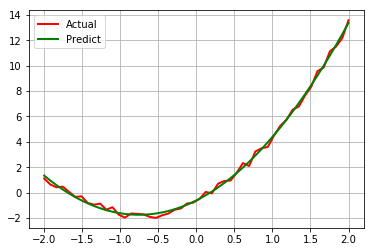

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])

x = np.linspace(-2, 2, 50)
A, B, C = 2, 3, -1
y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75

t = leastsq(residual, [0, 0, 0], args=(x, y))
theta = t[0]
print('真实值：', A, B, C)
print('预测值：', theta)
y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#6 四种回归的比较

##6.1 误差平方和-MSE
$\varphi=\frac{1}{m}\sum_{i=1}^m(y_i-\hat{y_i})^2$

如果MSE趋近于0，那么说明在训练集上拟合程度很好

##6.2 线性回归、岭回归、Lasso回归和弹性网的比较

###6.2.1 线性回归
![images](images/03/07.png)
图中画出了从1阶到8阶的拟合曲线，发现阶数越大，拟合程度越好，当全部拟合的时候，$R^2=1$。但是我们发现，8阶的曲线其实出现了一些过拟合的现象

###6.2.2 岭回归
![images](images/03/08.png)。过拟合现象降低了

###6.2.3 Lasso回归
![images](images/03/09.png)。过拟合现象降低了

###6.2.4 弹性网
![images](images/03/10.png)。过拟合现象降低了

##6.3 一些概念
对于m个样本$(\overrightarrow{x_1},y_1), (\overrightarrow{x_2},y_2),...,(\overrightarrow{x_m},y_m)$，某模型的估计值为$(\overrightarrow{x_1},\hat{y_1}), (\overrightarrow{x_2},\hat{y_2}),...,(\overrightarrow{x_m},\hat{y_m})$

样本的总平方和TSS(Total Sum of Squares):$TSS=\sum_{i=1}^m(y_i-\overline{y})^2$

残差平方和RSS(Residual Sum of Squares):$RSS=\sum_{i=1}^m(\hat{y_i}-y_i)^2$

$R^2=1-\frac{RSS}{TSS}$

$R^2$越大，拟合效果越好。最优值为1；若模型预测为随机值，$R^2$可能为负；若预测值恒为样本期望，$R^2=0$

ESS(Expalined Sum of Squares):$ESS=\sum_{i=1}^m(\hat{y_i}-\overline{y})^2$

只有在无偏估计时才有$TSS=ESS+RSS$；否则$TSS \ge ESS+RSS$

ESS又称为回归平方和SSR(Sum of Squares for Regression)